# Project: Fraud Detection

## Problem Formulation

Due to the private nature of financial data, there is a lack of publicly available datasets that can be used for analysis. In this project, a synthetic dataset, publicly available on Kaggle, generated using a simulator called PaySim is used. The dataset was generated using aggregated metrics from the private dataset of a multinational mobile financial
services company.

There are 6362620 instances of data set,  The data set has 11 attributes which include is 
- Type of transactions
- Amount transacted
- Customer ID and Recipient ID
- Old and New balance of Customer and Recipient
- Time step of the transaction
- Whether the transaction was fraudulent or not

## Problem Statement

Leverage the given data set to build an End-to-End Data Science Project and find whether a transaction is Fradulent or not.

## Hypothesis Generation

This is one of the important stages in any Data Science/Machine Learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can highly affect the target i.e. Fraudulent transaction:

- **Type of transaction:** Based on the type (mode) of payment might impact the fradulent transaction.

- **Amount:** The amount of transaction can decide the transaction is fradulent or not, we can find unusual activities through the amount of transaction.

- **Initial Balance and Balance left:** By comparing account balances before the transcation and after transaction we might able to find whether there is unusual activity is happened or not 

## Steps to follow

It is a Binary Classification Problem

- **General Overview:** Have a General Overview of the data
- **EDA:** Perform Exploratory Data Analysis(EDA) to gain more clear insights of the data
- **Data Preprocessing:** With the information gained after performing EDA, Preprocess the Data accordingly
- **Model Building:** Once the data is properly cleaned and preprocessed, use this data to build a Machine Learning
- **Hyperparameter Tuning:** Tune the Hyperparameters of the best performing model
- **Model Performance:** Assess the Performance of the Model on the Testing data set
- **Save the model:** Save the Best Performing Model
- **Predictions:** Make Predictions on the Testing data set

### After performing all the steps above, create a Web App and deploy the same on Cloud Platforms
 

In [1]:
# For performing any kind of Mathematical Operations
import numpy as np
# For dealing with DataFrames
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
# For visualizing the plottings better
%matplotlib inline
# For Data Visualization
import seaborn as sns

# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

# Saving the model
import pickle

## to ignore waarning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [2]:
data = pd.read_csv('../input/paysim1/PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df = data.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### A] Having an Overview of the data set

In [4]:
# Data set contains 'int64' & 'object' & 'float64' types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# No null values present within the data set

df.isnull().sum().sum()

0

In [6]:
#we have all 0s & 1s in our Target Feature and its a binary classification problem
df['isFraud'].unique()

array([0, 1])

### Checking whether the data set is balanced or not

In [7]:
# checking whether the data is balanced or not. 
# and it seems the dataset is imbalanced, so to deal with imbalanceness we will introduce class_weights while building the model

df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

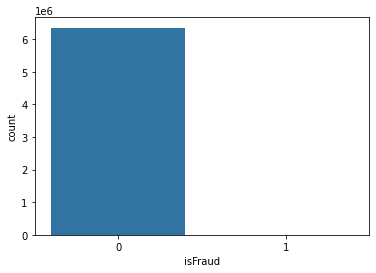

In [8]:
# Visualizing the distribution of the Target variable

sns.countplot(df['isFraud'])
plt.show()

In [9]:
df.shape

(6362620, 11)

In [10]:
# non fradulent transactions are 

100*(6354407/6362620)


99.87091795518198

#### fradulent transactions are 

100*(8213/6354407)


#### There is almost a 99% - 0.1% distribution of the Target values which seems data is highly unbalanced

 To deal with imbalanced data we will use class_weights as this is a finance dataset, because for the finance dataset if use oversampling or undersampling or smote they will create fake data points or duplicate data points, in the financial problems we need accurate information otherwise it will mislead us and we may end up with a bad model.

 so we give different weights to both the majority and minority classes. The whole purpose is to penalize the misclassification made by the minority class by setting a higher class weight and at the same time reducing weight for the majority class, which helps us optimize the scoring for the minority class and the algorithm could focus on reducing the errors for the minority class

#### Checking for Correlation among the Predictors

##### Correlation Heatmap


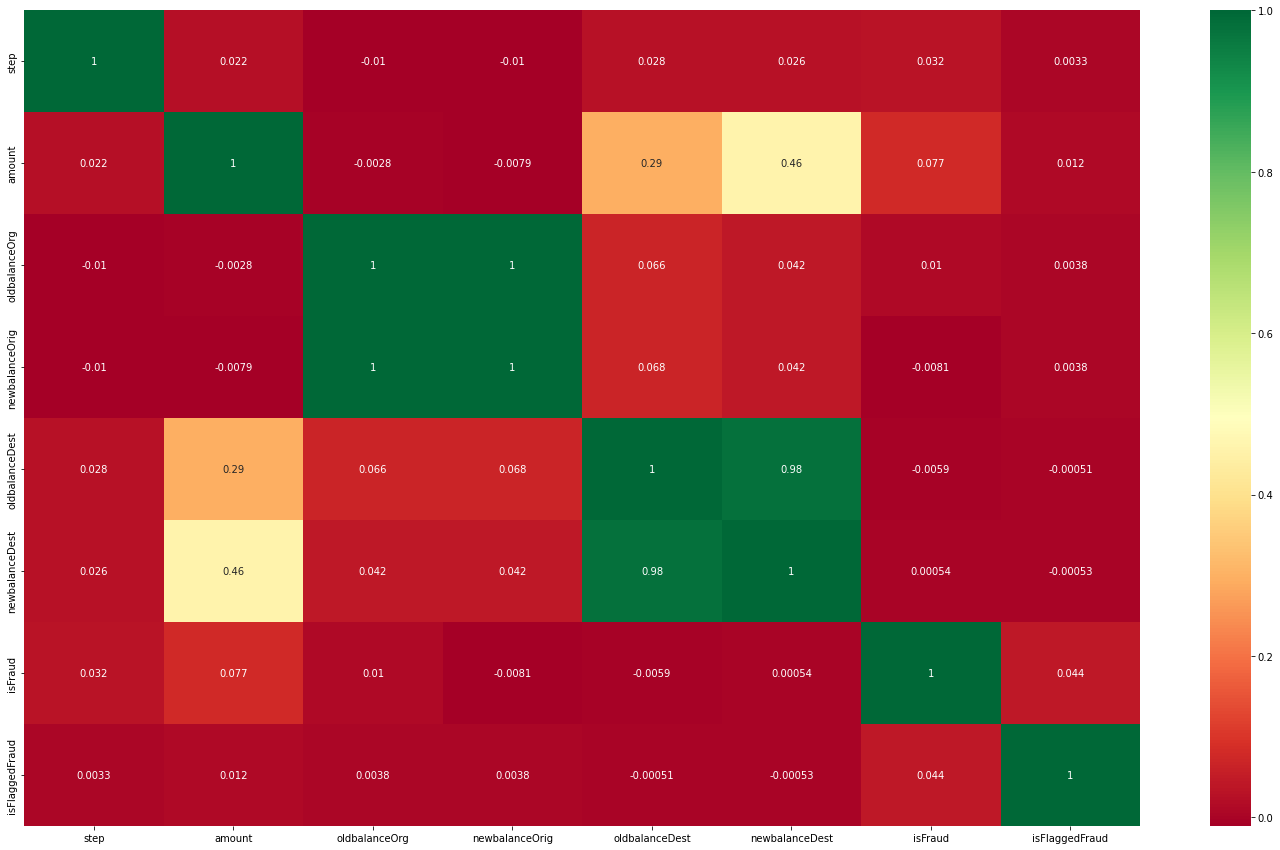

In [11]:
corr = df.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

#####  Here we can observe that there are some independent variables correlated with each other.

1. Input features oldbalanceDest and newbalanceDest are correlated with each other so we had to drop one of the feature. To decide which one to drop amongst them we have to check their correlation with dependent feature (isFraud), oldbalanceDest is highly negatively correlated (-0.0059) with target feature than newbalanceDest (0.00054). here i have to drop the newbalanceDest feature.

2. likewise above oldbalanceOrig and newbalanceOrig are also correlated with each other and newbalanceOrig is highly negatively correlated (-0.0081) with target feature than oldbalanceOrg (0.01). here i have to drop the oldbalanceOrg feature.


##### now i have to drop newbalanceDest and oldbalanceOrig features from the data

### B] Data Visualization and Exploratory Data Analysis (EDA)

#### a) Visualizing varibales

Plotting Bar Graphs in order to visualize to see the distributions

In [12]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

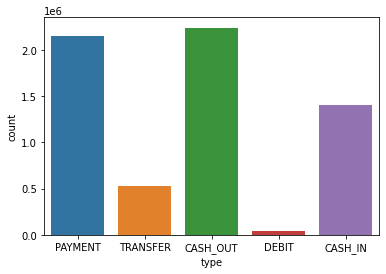

In [13]:
sns.countplot(df['type'])
plt.show()

The most frequent transaction types are CASH-OUT and PAYMENT

#### Fraud Transactions by Transaction Type

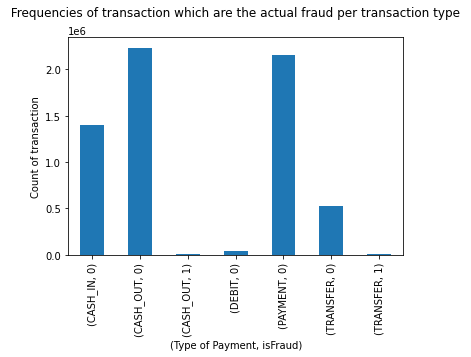

In [14]:
fraud_type = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
fraud_type.set_title(" Frequencies of transaction which are the actual fraud per transaction type \n" )
fraud_type.set_xlabel("(Type of Payment, isFraud)")
fraud_type.set_ylabel("Count of transaction")

plt.show()

#### Split of Fraud Transactions by Transaction Type

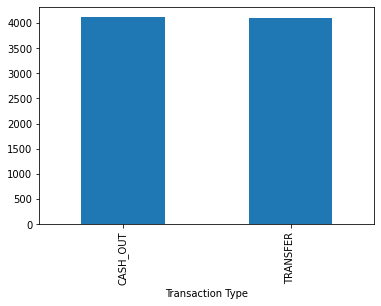

In [15]:
fraud = df['isFraud'].isin([1])

fraud_time = df[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Transaction Type")

plt.show()

The fraudulent transactions are splitted in an equal percentage. 

Only CASH-OUT and TRANSFER transactions can be fraudulent.

#### Checking the account balance is matching before transaction and after the transaction for both originator and recipient 

In [16]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

df['origBalance_inacc'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['destBalance_inacc'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(df['origBalance_inacc'].value_counts()[1]/df.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(df['destBalance_inacc'].value_counts()[1]/df.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


#### Checking Whether there is there any Transaction Amounts that are Negative or Zero

we have to check if the amount column is always positive or not ?
 

In [17]:
print("Number of transactions with amount is less 0?")
print(len(df[df.amount<0]))

print("Number of transactions with amount is equal to 0?")
print(len(df[df.amount==0]))

Number of transactions with amount is less 0?
0
Number of transactions with amount is equal to 0?
16


So there is 16 transacations when the amount is less than zero

#### checking about these 16 transactions are of which type of payment methods they used and are they fraudulent trasacntions or not?

In [18]:

print("What type of transactions are they?")
print(df[df.amount<=0]['type'].value_counts())

print("Are all these marked as Fraud Transactions?")
df[df.amount<=0]['isFraud'].value_counts()[1] == len(df[df.amount<=0])


What type of transactions are they?
CASH_OUT    16
Name: type, dtype: int64
Are all these marked as Fraud Transactions?


True

#### Checking whether the Falgged transactions are Fraudulent ones or not ?

In [19]:
df_temp = df[df.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(df_temp))

print("What type of transactions are they?")
print("\t",df_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",df_temp['isFraud'].value_counts()[1] == len(df_temp))

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True


Therefore, there is an almost equal likelihood that a fraudulent transaction can be
CASH_OUT or TRANSFER

All the fraud trnasactions belong to Transfer or Cash-out type, So, iam combinig all the type of payments(PAYMENT, CASH-IN and DEBIT) other than CASH-OUT and TRANSFER as OTHERS.

In [20]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [21]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [22]:
df['type'] = df['type'].map(type_map)

df['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

### Fraud and Non-Fraud Transactions Count by Time Step

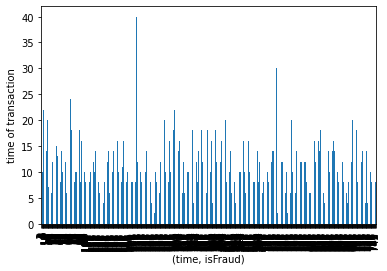

In [23]:
fraud = df['isFraud'].isin([1])

fraud_time = df[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

The fraud transactions are almost uniformly spread out across time steps, so this variable is not giving us any information which might impact the target variable. so its better to drop this variable.

### Train-Test Split

In [24]:
# deleting the unnecessary varibles from input data

X = df.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])

X.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,OTHERS,9839.64,160296.36,0.0,0,1
1,OTHERS,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,OTHERS,11668.14,29885.86,0.0,0,1


In [25]:
y = df['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [26]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## C] Data Preprocessing

###  Handling Categorical - Nominal Features (Encoding)



#### One Hot Encoding

In [28]:
dummies_type = pd.get_dummies(X_train['type'], prefix='type', drop_first=True)

In [29]:
X_train = pd.concat([X_train, dummies_type], axis=1)

In [30]:
X_train.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
1186641,OTHERS,186994.49,191974.49,2565463.66,1,1,1,0
1199598,CASH_OUT,86377.61,0.00,0.00,1,0,0,0
1185636,CASH_OUT,215489.19,0.00,6345756.55,1,1,0,0
6211424,TRANSFER,697319.21,0.00,2150239.95,1,0,0,1
4452703,OTHERS,59243.58,0.00,0.00,1,1,1,0


In [31]:
X_train = X_train.drop(columns=['type'])

### Preprocessing the Test Data separately

#### Nominal Features (To OneHot Encode)

In [32]:
dummies_type = pd.get_dummies(X_test['type'], prefix='type', drop_first=True)

In [33]:
X_test = pd.concat([X_test, dummies_type], axis=1)

In [34]:
X_test.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
3737323,OTHERS,330218.42,351084.42,452419.57,1,1,1,0
264914,OTHERS,11647.08,18722.92,0.00,0,1,1,0
85647,OTHERS,152264.21,258853.21,201303.01,1,1,1,0
5899326,TRANSFER,1551760.63,0.00,3198359.45,1,0,0,1
2544263,OTHERS,78172.30,2999503.88,415821.90,1,1,1,0


In [35]:
X_test = X_test.drop(columns=['type'])

In [36]:
(X_train.columns == X_test.columns).all()

True

## Model Building

### Logistic Regression Model implementation

In [37]:
lr = LogisticRegression(class_weight="balanced")

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.44482334086628106


### Logistic Regression Model Performance

In [38]:
y_pred = lr_model.predict(X_test)

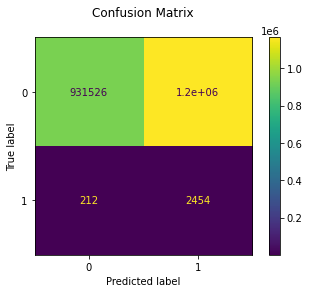

In [39]:
plot_confusion_matrix(lr_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [40]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.44      0.62   2096999
           1       0.00      0.92      0.00      2666

    accuracy                           0.44   2099665
   macro avg       0.50      0.68      0.31   2099665
weighted avg       1.00      0.44      0.61   2099665



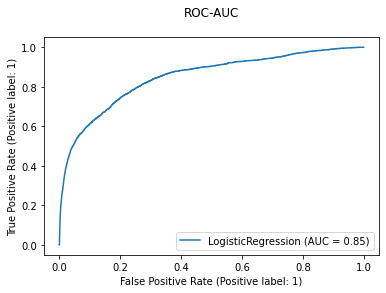

In [41]:
plot_roc_curve(lr_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

#### RandomForest Algorithm implemetation 

In [42]:
rf = RandomForestClassifier(class_weight="balanced")

In [43]:
rf_model = rf.fit(X_train, y_train)

In [44]:
rf_model.score(X_test, y_test)

0.9999928560032195

## Tuning the Hyperparameters of RandomForest Model

In [45]:
rf_params = {
    'n_estimators' : [50,100,130,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]
    
}

In [46]:
rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=5)

In [47]:
rf_best_model = rf_rs.fit(X_train, y_train)

In [48]:
rf_best_model.score(X_test, y_test)

0.9999904746709594

In [49]:
rf_best_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_leaf_nodes': None,
 'max_depth': None}

In [50]:
rf_best_model.best_estimator_

RandomForestClassifier(class_weight='balanced', min_samples_leaf=4,
                       min_samples_split=4)

### Random Forest Model Performance

In [51]:
y_pred = rf_best_model.predict(X_test)

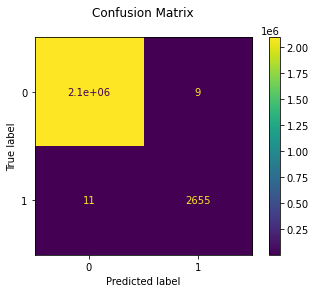

In [52]:
plot_confusion_matrix(rf_best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [53]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       1.00      1.00      1.00      2666

    accuracy                           1.00   2099665
   macro avg       1.00      1.00      1.00   2099665
weighted avg       1.00      1.00      1.00   2099665



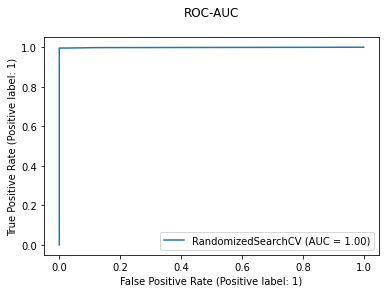

In [54]:
plot_roc_curve(rf_best_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()